Code adapted from the new fastai book.  By Jeremy Howard who runs the best deep learning course I've ever taken.  Chapter 04 will contain pretty much everything we need and is a great starting point!

https://github.com/fastai/fastbook

In [1]:
from fastai.vision import *

## Data preperation

In [2]:
path = untar_data(URLs.MNIST)

#### TODO: Augment Data
test effects of different transforms

In [3]:
tfms = get_transforms()

#### Load downloaded data into a databunch

In [4]:
data = (ImageList.from_folder(path)
        .split_by_folder(train='training', valid='testing')
        .label_from_folder()
        .databunch()
        .normalize())

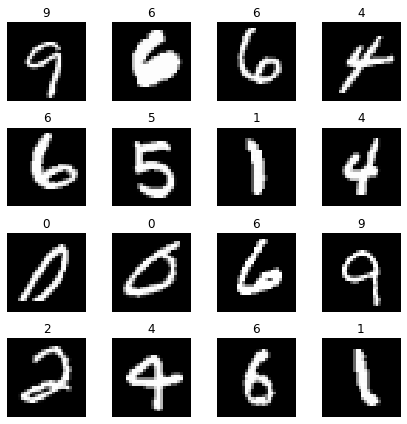

In [5]:
data.show_batch(rows=4, figsize=(6,6))

## Create and train a CNN model
 Uses the resnet18 architecture ( 18 hidden layers ) 
 and the cross_entropy loss function

In [6]:
learn = cnn_learner(data, models.resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 6e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.074944,0.042398,0.987400,01:03


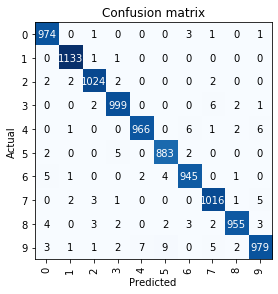

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()